<a href="https://colab.research.google.com/github/balkisdirahoui/pldac-/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree
from sklearn.model_selection import train_test_split
import math
import time
import matplotlib.pyplot as plt
#%load_ext autoreload
#%autoreload 2

### Objet split

In [87]:
class split():
  
    def __init_(self,data):
        self.data = data
        
    def split(self):
        return data

class splitML(split):
    def __init_(self,data, test_size, random_state):
        super().__init__(data)
        self.test_size =test_size
        self.random_state = random_state
        
    def split(self):
        return train_test_split(X, y, test_size= self.test_size , random_state= self.random_state)
    
class splitTransfert(split):
    def __init_(self,data):
        super().__init__(data)


### Main

In [88]:

class main :

  """modele : objet de la classe medele 
  """
  #modele = modele(data,params,metric)
    

In [89]:
class classifieur:
  
    def __init__(self,data,param_modele,param_split):
        self.data =data
        self.param_modele = param_modele
        self.param_split = param_split

        
    def fit(X,y):
        pass
    def predict(X):
        pass
    def score(X,y):
        pass
    
    def split(self):
        pass

        

### KNN

In [90]:

class knn(classifieur):
    """
    params = {"n_neigbors" : 2, "metric" : 'cosine' } par exemple
    param_modele : les parametres propres a un modeles 
    param_split : la taille du test et du train 
    """
    
    def __init__(self,data,param_modele,param_split):
        super().__init__(data,param_modele, param_split)
        for key in param_modele:
            setattr(self,key,param_modele[key])
            
        self.clf = KNN(**param_modele)
        print(data.shape)
        self.X_train,  self.X_test, self.y_train, self.y_test = train_test_split(data[:,:-1],data[:,-1], **param_split)
       

    def fit(self):
        self.clf.fit(self.X_train,self.y_train)
    def predcit(self):
        return self.clf.predict(self.X_test)
    def score(self):
      
        return self.clf.score(self.X_test,self.y_test)


In [91]:
p = {"a" : 2,"b":2, "c" : 2}
def f(data , a, b, c ):
    print(data)
    print(a)

f("data",**p)

data
2


In [92]:
def genere_dataset_gaussian(positive_center,positive_sigma,negative_center,negative_sigma,nb_points):
    data_pos= np.random.multivariate_normal(positive_center, positive_sigma, nb_points)
    data_neg= np.random.multivariate_normal(negative_center, negative_sigma, nb_points)

    data_label=np.asarray([-1 for i in range (nb_points)] +[+1 for i in range(nb_points)])
    
    data_decs=np.vstack((data_neg,data_pos))
    return data_decs,data_label     


X2, y2 = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

data2=np.hstack((X2,np.reshape(y2,(20,1))))# gaussian

In [93]:
print(data2[:,-1])


[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [94]:
param_modele = {"n_neighbors" : 2, "metric" : 'cosine'}
param_split  = {"test_size" : 0.33 , "random_state" : 42}
K = knn(data2, param_modele, param_split )
K.fit()
print(K.score())

(20, 3)
1.0


In [95]:
prams = {"n_neighbors" : 2, "metric" : 'cosine' }

### Decision trees

In [96]:
class dtrees(classifieur):
    
    
    def __init__(self,data,param_modele,param_split):
        super().__init__(data,param_modele, param_split)
        for key in param_modele:
            setattr(self,key,param_modele[key])
            
        self.clf = tree.DecisionTreeClassifier(**param_modele)

        self.X_train,  self.X_test, self.y_train, self.y_test = train_test_split(data[:,:-1],data[:,-1], **param_split)
    
   
    def fit(self):
        self.clf.fit(self.X_train, self.y_train )
    def predcit(self):
        return self.clf.predict(self.X_test)
    def score(self):
        return self.clf.score(self.X_test,self.y_test)
    
    


In [97]:
param_split  = {"test_size" : 0.33 , "random_state" : 42}
params_dtree= {"max_depth" : 3  } 
dtree = dtrees(data2,params_dtree,param_split)
dtree.fit()
dtree.max_depth
dtree.score()

1.0

### CoAt

In [132]:

class coAT(classifieur):

    def __init__(self, data,param_modele ,param_split=dict()): 
      super().__init__(data, param_modele ,param_split)
      for key in param_modele:
          setattr(self,key,param_modele[key])
      self.CB = []
    
    def set_sigS(self,sigS):
      self.sigS = sigS
        
    def set_sigR(self,sigR):
      self.sigR = sigR
    #fit
    def fit(self,data):
      self.CB = data
    #predict
    def change_outcomes(self,x,y):
      return (x,y)
    def predict(self,x):
      """
      prend en entrée un tuple x et retourne son label 
      (label qui minimise la complexité)
      """
      l = []
     
      start_time = time.time()
      for y in self.labels:
        tuple =  self.change_outcomes(x,y)
     
        l.append(self.inv(tuple,self.CB,self.w))
      times = (time.time() - start_time)
      return self.labels[np.argmin(l)],self.labels,l,times


    def score():
      pass
    
    #autre 
    def inv(self,s0, CB,w):
      """
      fonction qui calcule la cardinalité de l'ensemble ou sigmaS et sigmaR sont iversé pour un s0
      sigS : mesure de similarité 1
      sigR : mesure de similarité 2
      -> faire l'autre moitié des tests
      -> mettre les Sig dans des variable
      """
      cpt=0
      #parcourir les tuples du dataset 
      for si in  range(len(CB))  :
        for sj in range(si+1,len(CB)) :
          #########
          #CB[si] = [()]
          #CB[si][0] = () le reste dependra de la fonction de similarité (dimensions)
          sigS_si = self.sigS(s0[0],CB[si][0],self.w)
          sigS_sj = self.sigS(s0[0],CB[sj][0],self.w)
          sigR_si = self.sigR(s0[1],CB[si][1])
          sigR_sj = self.sigR(s0[1],CB[sj][1])
          ########
          #incrementer si inversion de similarité (sigR se base sur les labels)
          if( (sigS_si>=sigS_sj) and (sigR_si<sigR_sj)) or ( (sigS_si<sigS_sj) and (sigR_si>=sigR_sj)): 
            cpt+=1    
      return cpt
    def complex(self,CB):
      """
      fonction qui calcule la complexité d'un CB (dataset)
      """
      gamma=0
      for s0 in CB:
          gamma += self.inv(s0,CB,self.w)
      return gamma

    def predict_nonopt(self,x):
      """
      prend en entrée un tuple x et retourne son label 
      (label qui minimise la complexité)
      """
      l = []
      times = []
      for y in self.labels:
        tmp = self.CB + [self.change_outcomes(x,y)]
        start_time = time.time()
        l.append(self.complex(tmp))
        times.append((time.time() - start_time))
      return self.labels[np.argmin(l)],self.labels,l,times

  





  
# CoAT n'est pas ordinal 
# CCBI l'est


### Similarities

In [99]:
def sigmaArea(a1,a2):
  """
  retourne la similarité entre deux areas (int)
  """
  return(int(a1==a2))
####
#Nb rooms
def polynomialSim(n,L,y,x):
  
  return ((L-abs(y-x)**n)/(L**n))

def sigmaNbrooms(nb1,nb2):
  """
  Sigma nb rooms, mesure de similarité de nb rooms
  """
  return polynomialSim(2,6,nb1,nb2)

def sigmaS(a,b,w):
  """
  w : list of weights
  a : list [nbrooms1,area1]
  b : list [nbrooms2,area2]
  """
  nb_rooms1 , area1= a[0],a[1]
  nb_rooms2 , area2= b[0],b[1]
  #weights between 0.01 and 0.64
  sigmaAr=sigmaArea(area1,area2)
  sigmarooms = sigmaNbrooms(nb_rooms1,nb_rooms2)
  return w[0]*sigmarooms + (1-w[1])*sigmaAr

def sigmaR(p1,p2):
  return polynomialSim(2,1000,p1,p2)

In [100]:
#données
"""
situation : 0,1,2,
nb_rooms : 1,2,3
area : 0:midtown ,1 : downtown
price: 
"""
X_coat = np.array([[1,0], [2,0],[1,1],[3,1]])
y_coat = np.array([440,600,700,900])


#constuire les données
CB_coAt=[]
for i in range(len(X_coat)):
  CB_coAt.append((X_coat[i].tolist(),y_coat[i]))


In [112]:
#modele
param_modele = {"sigS" : sigmaS, "sigR" : sigmaR,"w":[0.5,0.5],"labels" : [440,600,700,900] + (np.arange(400,1200,100)).tolist()}
co= coAT([],param_modele )
#fit
co.fit(CB_coAt)
#predict
label,labels,gamma,_ = co.predict([2, 1])
labeln,labelsn,gamman,_ = co.predict_nonopt([2, 1])
print("le meilleur prix est : ",label)

le meilleur prix est :  800


### Variation du temps

{440: 5, 600: 3, 700: 1, 900: 1, 400: 5, 500: 5, 800: 0, 1000: 1, 1100: 1}


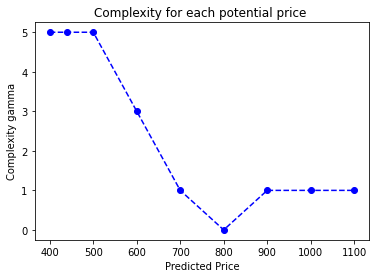

In [113]:
d = dict()
for l,g in zip(labels,gamma):
  d[l] = g
print(d)
lists = sorted(d.items())
labels,gamma = zip(*lists)


plt.xlabel('Predicted Price')
plt.ylabel('Complexity gamma')
plt.title('Complexity for each potential price ')
plt.plot(labels,gamma,'bo--')
plt.show()

{440: 18, 600: 12, 700: 8, 900: 10, 400: 17, 500: 16, 800: 5, 1000: 10, 1100: 11}


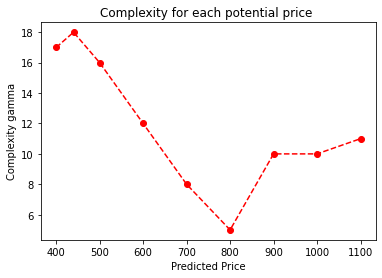

In [114]:
d2 = dict()
for l,g in zip(labelsn,gamman):
  d2[l] = g
print(d2)
lists2 = sorted(d2.items())
labelsn,gamman = zip(*lists2)
plt.xlabel('Predicted Price')
plt.ylabel('Complexity gamma')
plt.title('Complexity for each potential price ')
plt.plot(labelsn,gamman,'ro--')

plt.show()

In [115]:
lists

[(400, 5),
 (440, 5),
 (500, 5),
 (600, 3),
 (700, 1),
 (800, 0),
 (900, 1),
 (1000, 1),
 (1100, 1)]

In [117]:
lists2


#print(np.array(lists) - np.array(lists2))

[(400, 17),
 (440, 18),
 (500, 16),
 (600, 12),
 (700, 8),
 (800, 5),
 (900, 10),
 (1000, 10),
 (1100, 11)]

{400: 17, 440: 18, 500: 16, 600: 12, 700: 8, 800: 5, 900: 10, 1000: 10, 1100: 11}


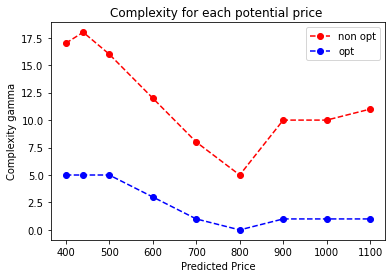

In [106]:
d2 = dict()
for l,g in zip(labelsn,gamman):
  d2[l] = g
print(d2)
lists = sorted(d2.items())
labelsn,gamman = zip(*lists)
plt.xlabel('Predicted Price')
plt.ylabel('Complexity gamma')
plt.title('Complexity for each potential price ')
plt.plot(labelsn,gamman,'ro--',label="non opt")
plt.plot(labels,gamma,'bo--',label="opt")
plt.legend()
plt.show()



## Variation du temps d'execution

In [107]:
labelopt,labels,_,timesopt= co.predict([2, 1])
label,times = co.predict_nonopt([2, 1])
# verification que c'est le meme 
print(labelopt == label)

ValueError: ignored

#### Plot

{400: 0.0005087852478027344, 440: 0.00048661231994628906, 500: 0.0004956722259521484, 600: 0.0004849433898925781, 700: 0.0005052089691162109, 800: 0.00048279762268066406, 900: 0.0005042552947998047, 1000: 0.00048470497131347656, 1100: 0.0004923343658447266}
{400: 0.0005087852478027344, 440: 0.00048661231994628906, 500: 0.0004956722259521484, 600: 0.0004849433898925781, 700: 0.0005052089691162109, 800: 0.00048279762268066406, 900: 0.0005042552947998047, 1000: 0.00048470497131347656, 1100: 0.0004923343658447266}


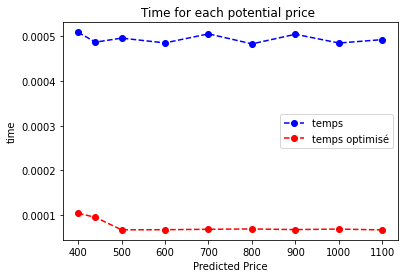

In [118]:



d = dict()
for l,g in zip(labels,times):
  d[l] = g
print(d)
lists = sorted(d.items())
labels,times = zip(*lists)

d2 = dict()
for l,g in zip(labels,timesopt):
  d2[l] = g
print(d)
lists = sorted(d2.items())
labels,timesopt = zip(*lists)

plt.xlabel('Predicted Price')
plt.ylabel('time')
plt.title('Time for each potential price ')
plt.plot(labels,times,'bo--',label = 'temps ')
plt.plot(labels,timesopt,'ro--',label = 'temps optimisé')
plt.legend()
plt.show()

In [119]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # we only take the first two features.
y_iris = iris.target
CB_iris=[]
for i in range(len(X_iris)-10, len(X_iris)):
  CB_iris.append((X_iris[i],y_iris[i]))
print(CB_iris)

[(array([6.7, 3.1]), 2), (array([6.9, 3.1]), 2), (array([5.8, 2.7]), 2), (array([6.8, 3.2]), 2), (array([6.7, 3.3]), 2), (array([6.7, 3. ]), 2), (array([6.3, 2.5]), 2), (array([6.5, 3. ]), 2), (array([6.2, 3.4]), 2), (array([5.9, 3. ]), 2)]


In [120]:

def sigS(s1,s2,w =None):
  if isinstance(s1, np.ndarray): 
    return ((np.abs(s1-s2)).sum())**2
  return (np.abs(s1-s2))**2
  # (np.abs(s1-s2)) ou (np.abs(s1-s2))^2
  
def sigR(o1,o2,w = None):


  return (np.abs(o1-o2))**2
#modele
param_modele = {"sigS" : sigS, "sigR" : sigR,"w":None,"labels" : y_iris}
co= coAT([],param_modele )
#fit
co.fit(CB_iris)
#predict
label,labels,gamma,_ = co.predict(np.array([6.7, 3.1]))
print(label)
#labeln,labelsn,gamman,_ = co.predict_nonopt([2, 1])
#print("le meilleur prix est : ",label)

0


In [ ]:
print(X_iris[0].shape)

In [143]:
iris = datasets.load_iris()
n = 2
X_iris = iris.data[:, :n]  # we only take the first two features.
y_iris = iris.target
CB_iris=[]
for i in range(len(X_iris)-10, len(X_iris)):
  CB_iris.append((X_iris[i],y_iris[i]))

d = dict() #dictionnaire de temps en fonction du nombre de features
for n in range(1,150):
  X_iris = iris.data[:n, :]  # we only take the first n features.
  y_iris = iris.target
  CB_iris=[]
  for i in range(0, len(X_iris)):
    CB_iris.append((X_iris[i],y_iris[i]))
  co= coAT([],param_modele )
  co.fit(CB_iris)
  test =  np.random.randn(X_iris.shape[1],)
  label,labels,gamma,times = co.predict(test)
  d[n] = times




KeyboardInterrupt: ignored

In [130]:

print(d)
lists = sorted(d.items())
labels,times = zip(*lists)


{0: [0.0006380081176757812, 0.0004994869232177734, 0.0005140304565429688, 0.0004940032958984375, 0.0005052089691162109, 0.0005009174346923828, 0.0005130767822265625, 0.0004980564117431641, 0.0005338191986083984, 0.0004906654357910156, 0.0005071163177490234, 0.0004947185516357422, 0.0005080699920654297, 0.00048661231994628906, 0.0005099773406982422, 0.0005078315734863281, 0.0005204677581787109, 0.00048804283142089844, 0.0005090236663818359, 0.0005004405975341797, 0.0004999637603759766, 0.0004897117614746094, 0.0005002021789550781, 0.0004851818084716797, 0.0005948543548583984, 0.0004968643188476562, 0.0005075931549072266, 0.0004863739013671875, 0.000499725341796875, 0.0004942417144775391, 0.0005047321319580078, 0.0004889965057373047, 0.000499725341796875, 0.00048422813415527344, 0.0005023479461669922, 0.0004858970642089844, 0.0004992485046386719, 0.0004851818084716797, 0.0005066394805908203, 0.0004870891571044922, 0.0005156993865966797, 0.0004870891571044922, 0.0005347728729248047, 0.000

In [ ]:


print(d)
lists = sorted(d.items())
labels,times = zip(*lists)

plt.xlabel('Predicted Price')
plt.ylabel('time')
plt.title('Time for each potential price ')
plt.plot(labels,times,'b',label = 'temps ')
plt.legend()
plt.show()

In [127]:
print(d[2])

[0.0005156993865966797, 0.0005092620849609375, 0.0004901885986328125, 0.0005030632019042969, 0.0004906654357910156, 0.0005116462707519531, 0.0004878044128417969, 0.0005245208740234375, 0.0004885196685791016, 0.0005102157592773438, 0.0004918575286865234, 0.0004949569702148438, 0.00048542022705078125, 0.0005080699920654297, 0.00048828125, 0.0005047321319580078, 0.000492095947265625, 0.0005097389221191406, 0.0004923343658447266, 0.0005056858062744141, 0.0004966259002685547, 0.0005102157592773438, 0.0004923343658447266, 0.0005035400390625, 0.0004904270172119141, 0.0005040168762207031, 0.0004894733428955078, 0.0005087852478027344, 0.0004878044128417969, 0.0005004405975341797, 0.0004937648773193359, 0.0005097389221191406, 0.00048828125, 0.0004990100860595703, 0.0004889965057373047, 0.0005118846893310547, 0.0004899501800537109, 0.0005016326904296875, 0.0004892349243164062, 0.0005071163177490234, 0.0005037784576416016, 0.0005037784576416016, 0.0004911422729492188, 0.0005328655242919922, 0.0004